In [1]:
import pandas as pd
import numpy as np
import datetime
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10

In [2]:
df = pd.read_csv('terrorism.csv', encoding = 'latin1')
df.head()

/Users/haoranyu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(72799, 135)

In [4]:
df[df['nkill'] == df['nkill'].max()]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
55934,1.994040e+11,1994,4,13,NaN,0,NaN,168,Rwanda,11,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.279900e+04,72799.000000,72799.000000,72799.000000,72799.000000,72799.000000,72799.000000,69025.000000,6.902400e+04,72799.000000,...,7.700000e+02,82.000000,2.550000e+02,86.000000,2170.000000,1784.000000,72799.000000,72799.000000,72799.000000,72799.000000
mean,1.987848e+11,1987.783733,6.453797,15.355980,0.023888,146.914133,5.823706,18.814987,-1.258622e+03,1.436957,...,3.467092e+06,9496.500000,8.241024e+05,1324.151163,3.625346,-5.183296,-3.762043,-3.718540,0.126691,-2.968956
std,7.074528e+08,7.074209,3.391804,8.803326,0.152700,136.883541,3.200669,24.090233,3.280470e+05,1.107013,...,3.752740e+07,50504.257174,3.719860e+06,7232.887028,1.873403,52.859166,4.502114,4.558795,0.794433,4.519316
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.983030e+11,1983.000000,4.000000,8.000000,0.000000,61.000000,3.000000,6.173460,-7.553355e+01,1.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.988110e+11,1988.000000,6.000000,15.000000,0.000000,110.000000,6.000000,16.929993,-1.977903e+00,1.000000,...,1.500000e+04,0.000000,0.000000e+00,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.992120e+11,1992.000000,9.000000,23.000000,0.000000,183.000000,8.000000,38.552185,3.521406e+01,1.000000,...,5.000000e+05,0.000000,9.717150e+04,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,1.000000
max,2.001080e+11,2001.000000,12.000000,31.000000,1.000000,1003.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,400000.000000,4.100000e+07,48000.000000,7.000000,750.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df1 = df.groupby(['gname'])['eventid'].count().reset_index(name='count').sort_values(['count'], ascending=False)                      

In [7]:
df1.head()

,gname,count
2343,Unknown,25568
2035,Shining Path (SL),4506
779,Farabundo Marti National Liberation Front (FMLN),3351
1037,Irish Republican Army (IRA),2662
386,Basque Fatherland and Freedom (ETA),1862


In [8]:
df1[df1['gname'] == 'Taliban']

,gname,count
2167,Taliban,6


In [9]:
missing = df.isnull().sum()

In [10]:
missing = missing/(df.shape[0]) * 100

In [11]:
missing.sort_values(inplace=True)

In [12]:
missing

eventid              0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000000
multiple             0.000000
success              0.000000
suicide              0.000000
crit1                0.000000
attacktype1          0.000000
targtype1_txt        0.000000
property             0.000000
weaptype1_txt        0.000000
weaptype1            0.000000
individual           0.000000
INT_ANY              0.000000
targtype1            0.000000
dbsource             0.000000
attacktype1_txt      0.000000
vicinity             0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
INT_MISC             0.000000
extended             0.000000
INT_LOG              0.000000
INT_IDEO             0.000000
country              0.000000
country_txt          0.000000
gname                0.000000
region               0.000000
                      ...    
guncertain2         99.678567
targtype3           99.684062
targtype3_

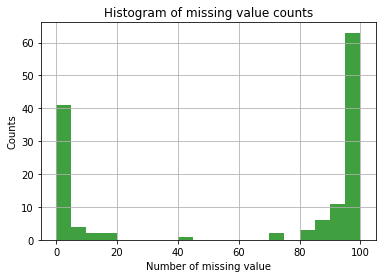

In [13]:
#Plot distribution of missing value counts
plt.hist(missing, bins=20, facecolor='g', alpha=0.75)

plt.xlabel('Number of missing value')
plt.ylabel('Counts')
plt.title('Histogram of missing value counts')
plt.grid(True)
plt.show()

In [14]:
missing_20 = [col for col in df.columns if (df[col].isnull().sum()/df.shape[0]) * 100 > 20]
print(missing_20)

['approxdate', 'resolution', 'location', 'summary', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'corp1', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'dive

In [15]:
for col in missing_20:
    df.drop(col, axis=1, inplace=True)

In [16]:
df.shape

(72799, 49)

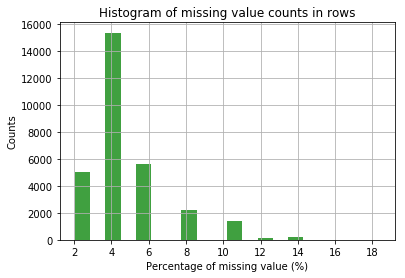

In [17]:
# How much data is missing in each row of the dataset?
missing_row = df.isnull().sum(axis=1)
missing_row = missing_row[missing_row > 0]/(len(df.columns)) * 100
missing_row.sort_values(inplace=True)

plt.hist(missing_row, bins=20, facecolor='g', alpha=0.75)


plt.xlabel('Percentage of missing value (%)')
plt.ylabel('Counts')
plt.title('Histogram of missing value counts in rows')
plt.grid(True)
plt.show()

In [18]:
df = df[df['imonth'] != 0]
df = df[df['iday'] != 0]
df.shape

(72104, 49)

In [19]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nwound',
       'property', 'ishostkid', 'ransom', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [20]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nwound,property,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,1.0,0.0,0,0.0,0.0,PGIS,0,0,0,0
5,1.970010e+11,1970,1,1,0,217,United States,1,North America,Illinois,...,0.0,0.0,1,0.0,0.0,Hewitt Project,-9,-9,0,-9
6,1.970010e+11,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,0.0,0.0,0,0.0,0.0,PGIS,0,0,0,0
7,1.970010e+11,1970,1,2,0,217,United States,1,North America,California,...,0.0,0.0,1,0.0,0.0,Hewitt Project,-9,-9,0,-9
8,1.970010e+11,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0.0,0.0,1,0.0,0.0,Hewitt Project,0,0,0,0


In [21]:
df["year_month"] = (df['iyear'] - 1970) * 12 + df['imonth']

In [22]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwound,property,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,year_month
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0,0.0,0.0,PGIS,0,0,0,0,7
5,1.970010e+11,1970,1,1,0,217,United States,1,North America,Illinois,...,0.0,1,0.0,0.0,Hewitt Project,-9,-9,0,-9,1
6,1.970010e+11,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,0.0,0,0.0,0.0,PGIS,0,0,0,0,1
7,1.970010e+11,1970,1,2,0,217,United States,1,North America,California,...,0.0,1,0.0,0.0,Hewitt Project,-9,-9,0,-9,1
8,1.970010e+11,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0.0,1,0.0,0.0,Hewitt Project,0,0,0,0,1
9,1.970010e+11,1970,1,3,0,217,United States,1,North America,Wisconsin,...,0.0,1,0.0,0.0,Hewitt Project,0,0,0,0,1
10,1.970010e+11,1970,1,1,0,217,United States,1,North America,Wisconsin,...,0.0,0,0.0,0.0,PGIS,0,0,0,0,1
11,1.970010e+11,1970,1,6,0,217,United States,1,North America,Colorado,...,0.0,1,0.0,0.0,Hewitt Project,-9,-9,0,-9,1
12,1.970010e+11,1970,1,8,0,98,Italy,8,Western Europe,Lazio,...,0.0,0,0.0,0.0,Hijacking DB,-9,-9,1,1,1
13,1.970010e+11,1970,1,9,0,217,United States,1,North America,Michigan,...,0.0,1,0.0,0.0,Hewitt Project,-9,-9,0,-9,1


In [23]:
columns_to_keep = ['year_month', 'latitude', 'longitude', 'success', 'suicide', 
                   'attacktype1_txt', 'targtype1_txt','natlty1_txt', 'weaptype1_txt', 'nkill', 'nwound','gname']

In [24]:
data_cleaned = df[columns_to_keep]

In [25]:
data_cleaned

,year_month,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt,nkill,nwound,gname
0,7,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Dominican Republic,Unknown,1.0,0.0,MANO-D
5,1,37.005105,-89.176269,1,0,Armed Assault,Police,United States,Firearms,0.0,0.0,Black Nationalists
6,1,-34.891151,-56.187214,0,0,Assassination,Police,Uruguay,Firearms,0.0,0.0,Tupamaros (Uruguay)
7,1,37.791927,-122.225906,1,0,Bombing/Explosion,Utilities,United States,Explosives,0.0,0.0,Unknown
8,1,43.076592,-89.412488,1,0,Facility/Infrastructure Attack,Military,United States,Incendiary,0.0,0.0,New Year's Gang
9,1,43.072950,-89.386694,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0,New Year's Gang
10,1,43.468500,-89.744299,0,0,Bombing/Explosion,Military,United States,Explosives,0.0,0.0,"Weather Underground, Weathermen"
11,1,39.758968,-104.876305,1,0,Facility/Infrastructure Attack,Military,United States,Incendiary,0.0,0.0,Left-Wing Militants
12,1,41.890961,12.490069,1,0,Hijacking,Airports & Aircraft,United States,Firearms,0.0,0.0,Unknown
13,1,42.331685,-83.047924,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0,Left-Wing Militants


In [26]:
data_cleaned.shape 

(72104, 12)

In [27]:
a = data_cleaned.groupby("gname").count()['year_month'] > 100

In [28]:
list_of_gname = data_cleaned.groupby("gname").count()[a].index.tolist()

In [29]:
list_of_gname

['African National Congress (South Africa)',
 "Al-Gama'at al-Islamiyya (IG)",
 'Anti-Abortion extremists',
 'Armed Islamic Group (GIA)',
 'Armenian Secret Army for the Liberation of Armenia',
 'Basque Fatherland and Freedom (ETA)',
 'Black September',
 'Chechen Rebels',
 'Corsican National Liberation Front (FLNC)',
 'Corsican National Liberation Front- Historic Channel',
 'Death Squad',
 'Democratic Revolutionary Alliance (ARDE)',
 'Dev Sol',
 'Farabundo Marti National Liberation Front (FMLN)',
 'First of October Antifascist Resistance Group (GRAPO)',
 'Fuerzas Armadas de Liberacion Nacional (FALN)',
 'Guatemalan National Revolutionary Unity (URNG)',
 'Guerrilla Army of the Poor (EGP)',
 'Hamas (Islamic Resistance Movement)',
 'Hezbollah',
 'Hutu extremists',
 'Irish National Liberation Army (INLA)',
 'Irish Republican Army (IRA)',
 'Islamic Salvation Front (FIS)',
 'Islamist extremists',
 'Khmer Rouge',
 "Kurdistan Workers' Party (PKK)",
 'Left-Wing Guerrillas',
 'Left-Wing Militants'

In [30]:
list_of_gname.remove('Unknown')

In [44]:
data_cleaned = data_cleaned.loc[data_cleaned['gname'].isin(list_of_gname)]

In [45]:
data_cleaned

,year_month,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt,nkill,nwound,gname
11,1,39.758968,-104.876305,1,0,Facility/Infrastructure Attack,Military,United States,Incendiary,0.0,0.0,Left-Wing Militants
13,1,42.331685,-83.047924,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0,Left-Wing Militants
33,1,41.241996,-82.615241,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0,Left-Wing Militants
39,1,15.675051,120.331618,0,0,Unknown,Military,United States,Unknown,0.0,1.0,New People's Army (NPA)
41,2,45.511795,-122.675629,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0,Left-Wing Militants
64,2,40.697132,-73.931351,1,0,Bombing/Explosion,Business,United States,Explosives,0.0,0.0,Left-Wing Militants
69,2,37.755363,-122.443352,0,0,Armed Assault,Police,United States,Firearms,0.0,0.0,Left-Wing Militants
76,2,41.763325,-72.674069,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0,Left-Wing Militants
81,2,40.697132,-73.931351,0,0,Facility/Infrastructure Attack,Police,United States,Incendiary,0.0,0.0,Left-Wing Militants
82,2,40.697132,-73.931351,1,0,Facility/Infrastructure Attack,Military,United States,Incendiary,0.0,0.0,Left-Wing Militants


In [46]:
map1 = {}
for item in list_of_gname:
    map1[item] = list_of_gname.index(item)

In [47]:
data_dropped = data_cleaned.dropna()

In [75]:
data_dropped.shape 

(26912, 12)

In [79]:
data_dropped = data_dropped[data_dropped['attacktype1_txt'] != 'Unknown']

In [80]:
data_dropped = data_dropped[data_dropped['targtype1_txt'] != 'Unknown']

In [81]:
data_dropped = data_dropped[data_dropped['natlty1_txt'] != 'Unknown']

In [82]:
data_dropped = data_dropped[data_dropped['weaptype1_txt'] != 'Unknown']

In [83]:
data_dropped.shape

(24555, 12)

In [84]:
gname = data_dropped.gname

In [85]:
gname_num = gname.map(map1)
gname_num

11       28
13       28
33       28
41       28
64       28
69       28
76       28
81       28
82       28
91       28
99       28
101      28
106      28
109      28
121      28
134      28
135      28
143      28
159      28
160      28
163      28
170      28
172      28
173      28
185      28
211      28
217      28
224      28
226      50
227      28
         ..
72666    20
72668    56
72669    33
72670     7
72678    42
72679    42
72686    42
72691    42
72692    42
72693    42
72694    42
72695    42
72696    42
72697    42
72703     7
72710    42
72711    43
72712    43
72726    60
72732     7
72734     5
72752     5
72753     5
72769    42
72779     8
72780     5
72785    42
72790     7
72791     7
72796    43
Name: gname, Length: 24555, dtype: int64

In [86]:
data_dropped_final = data_dropped.drop(['gname'], axis = 1)
data_dropped_final

,year_month,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt,nkill,nwound
11,1,39.758968,-104.876305,1,0,Facility/Infrastructure Attack,Military,United States,Incendiary,0.0,0.0
13,1,42.331685,-83.047924,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0
33,1,41.241996,-82.615241,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0
41,2,45.511795,-122.675629,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0
64,2,40.697132,-73.931351,1,0,Bombing/Explosion,Business,United States,Explosives,0.0,0.0
69,2,37.755363,-122.443352,0,0,Armed Assault,Police,United States,Firearms,0.0,0.0
76,2,41.763325,-72.674069,1,0,Facility/Infrastructure Attack,Government (General),United States,Incendiary,0.0,0.0
81,2,40.697132,-73.931351,0,0,Facility/Infrastructure Attack,Police,United States,Incendiary,0.0,0.0
82,2,40.697132,-73.931351,1,0,Facility/Infrastructure Attack,Military,United States,Incendiary,0.0,0.0
91,2,32.222232,-110.925752,1,0,Bombing/Explosion,Military,United States,Explosives,0.0,0.0


In [87]:
features_final = pd.get_dummies(data_dropped_final)
features_final

,year_month,latitude,longitude,success,suicide,nkill,nwound,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,...,natlty1_txt_Zambia,natlty1_txt_Zimbabwe,weaptype1_txt_Chemical,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Melee,weaptype1_txt_Other,weaptype1_txt_Sabotage Equipment,"weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
11,1,39.758968,-104.876305,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,1,42.331685,-83.047924,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33,1,41.241996,-82.615241,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41,2,45.511795,-122.675629,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
64,2,40.697132,-73.931351,1,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
69,2,37.755363,-122.443352,0,0,0.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
76,2,41.763325,-72.674069,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
81,2,40.697132,-73.931351,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
82,2,40.697132,-73.931351,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
91,2,32.222232,-110.925752,1,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [88]:
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

153 total features after one-hot encoding.


In [89]:
features_final['longitude'].min()

-124.135167

In [90]:
features_final = features_final[features_final['longitude'] > - 180]

In [91]:
cols_to_norm = ['year_month','latitude', 'longitude']
features_final[cols_to_norm] = features_final[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [92]:
features_final

,year_month,latitude,longitude,success,suicide,nkill,nwound,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,...,natlty1_txt_Zambia,natlty1_txt_Zimbabwe,weaptype1_txt_Chemical,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Melee,weaptype1_txt_Other,weaptype1_txt_Sabotage Equipment,"weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
11,0.000000,0.799431,0.069047,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,0.000000,0.825033,0.147307,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33,0.000000,0.814189,0.148858,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41,0.002611,0.856680,0.005233,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
64,0.002611,0.808767,0.179991,1,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
69,0.002611,0.779492,0.006066,0,0,0.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
76,0.002611,0.819377,0.184499,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
81,0.002611,0.808767,0.179991,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
82,0.002611,0.808767,0.179991,1,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
91,0.002611,0.724430,0.047359,1,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [93]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    gname_num, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 19644 samples.
Testing set has 4911 samples.


In [97]:
from time import time
from sklearn.metrics import fbeta_score, accuracy_score 

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    
    end = time() # Get end time
    
    results['train_time'] = end - start 
        

    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    results['pred_time'] = end - start 
            
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
 
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ((results['acc_train'], results['acc_test']))
    print (results['train_time'], results['pred_time'])
    print ("___________________________________________________________________________")
    
    return results

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

clf_A = LogisticRegression(random_state=0, multi_class='multinomial', solver ='newton-cg')


samples100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 196 samples.
(0.5775300346161678, 0.563021787823254)
0.37046027183532715 0.026617765426635742
___________________________________________________________________________
LogisticRegression trained on 1964 samples.
(0.7277540215841988, 0.7100386886581145)
3.7349979877471924 0.05774211883544922
___________________________________________________________________________
LogisticRegression trained on 19644 samples.
(0.7944410507025046, 0.7745876603543067)
113.69014573097229 0.05230212211608887
___________________________________________________________________________


In [118]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = LogisticRegression(random_state = 0, multi_class='multinomial', solver ='newton-cg', verbose = 1)

c = [0.1, 1, 10]
parameters = {'C' : c}


scorer = make_scorer(accuracy_score)


grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer, verbose = 3)



grid_fit = grid_obj.fit(X_train, y_train)


best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.7s remaining:    0.0s


[CV] .................................. C=0.1, score=0.741935 -  27.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.7s remaining:    0.0s


[CV] .................................. C=0.1, score=0.745724 -  26.1s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s finished


[CV] .................................. C=0.1, score=0.744329 -  28.6s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.1s finished


[CV] .................................... C=1, score=0.773128 -  57.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.2s finished


[CV] .................................... C=1, score=0.776268 -  59.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


[CV] .................................... C=1, score=0.769313 - 1.0min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


[CV] ................................... C=10, score=0.790323 - 2.3min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


[CV] ................................... C=10, score=0.792303 - 2.1min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.2min finished


[CV] ................................... C=10, score=0.784335 - 2.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min finished


Unoptimized model
------
Accuracy score on testing data: 0.7746

Optimized Model
------
Final accuracy score on the testing data: 0.7901


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

clf_A = LogisticRegression(random_state=0, multi_class='multinomial', solver ='lbfgs', C = 13)


samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)


# Collect results on the learners
results = {}
for clf in [clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 196 samples.
(0.5892384443086948, 0.5703522704133578)
0.24500608444213867 0.026337146759033203
___________________________________________________________________________
LogisticRegression trained on 1964 samples.
(0.6916106699246589, 0.6709427815108939)
0.5126619338989258 0.029422998428344727
___________________________________________________________________________
LogisticRegression trained on 19644 samples.
(0.7199144777031155, 0.7037263286499694)
5.741279125213623 0.02968597412109375
___________________________________________________________________________


In [159]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = LogisticRegression(random_state = 0, multi_class='multinomial', solver ='lbfgs', verbose = 1)

c = [0.1, 1, 10]
parameters = {'C' : c}


scorer = make_scorer(accuracy_score)


grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer, verbose = 3)


grid_fit = grid_obj.fit(X_train, y_train)


best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] .................................. C=0.1, score=0.706482 -   3.8s
[CV] C=0.1 ...........................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV] .................................. C=0.1, score=0.714111 -   3.7s
[CV] C=0.1 ...........................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


[CV] .................................. C=0.1, score=0.695739 -   3.9s
[CV] C=1 .............................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


[CV] .................................... C=1, score=0.715460 -   4.3s
[CV] C=1 .............................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


[CV] .................................... C=1, score=0.712584 -   3.8s
[CV] C=1 .............................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


[CV] .................................... C=1, score=0.699877 -   4.0s
[CV] C=10 ............................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


[CV] ................................... C=10, score=0.717285 -   3.8s
[CV] C=10 ............................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


[CV] ................................... C=10, score=0.711057 -   3.6s
[CV] C=10 ............................................................


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.5s finished


[CV] ................................... C=10, score=0.700950 -   3.7s


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished


Unoptimized model
------
Accuracy score on testing data: 0.7011

Optimized Model
------
Final accuracy score on the testing data: 0.7039


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


In [161]:
model = best_clf

importances = model.coef_
importances

array([[-5.21670787e-01, -2.80858653e+00,  7.95268246e-01, ...,
        -1.49168406e-03, -1.51257243e-03, -2.31194039e-03],
       [ 5.93289907e-01,  1.29161926e-01,  3.87281338e-01, ...,
        -1.91696225e-03, -1.49126957e-03, -1.83180505e-03],
       [ 3.69967632e-01,  5.72933577e-01, -6.86065989e-01, ...,
        -1.08770110e-03, -4.10809633e-03, -5.04440338e-04],
       ...,
       [ 5.03430727e-01,  1.18642987e+00,  2.77045427e-01, ...,
        -1.19462124e-03, -1.31756099e-03, -5.93039665e-04],
       [ 2.95271905e-02,  3.11138864e-01, -6.59517326e-03, ...,
        -5.08277603e-04, -6.81401201e-04, -3.93226589e-04],
       [ 6.09808071e-01, -7.65045788e-01, -1.66210315e-01, ...,
        -6.47261303e-04, -9.49986736e-04, -4.46310937e-04]])

In [162]:
importances.shape 

(69, 153)

Index(['natlty1_txt_South Africa', 'longitude', 'targtype1_txt_Police',
       'targtype1_txt_Government (General)', 'weaptype1_txt_Explosives'],
      dtype='object')
Index(['natlty1_txt_Egypt', 'targtype1_txt_Police', 'weaptype1_txt_Firearms',
       'year_month', 'attacktype1_txt_Assassination'],
      dtype='object')
Index(['targtype1_txt_Abortion Related', 'natlty1_txt_United States',
       'attacktype1_txt_Facility/Infrastructure Attack',
       'weaptype1_txt_Incendiary', 'latitude'],
      dtype='object')
Index(['natlty1_txt_Algeria', 'year_month', 'latitude',
       'targtype1_txt_Private Citizens & Property',
       'targtype1_txt_Journalists & Media'],
      dtype='object')
Index(['targtype1_txt_Airports & Aircraft', 'natlty1_txt_Turkey', 'latitude',
       'weaptype1_txt_Explosives', 'attacktype1_txt_Bombing/Explosion'],
      dtype='object')
Index(['natlty1_txt_Spain', 'latitude', 'natlty1_txt_France',
       'targtype1_txt_Business', 'targtype1_txt_Police'],
      dtype=

/Users/haoranyu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


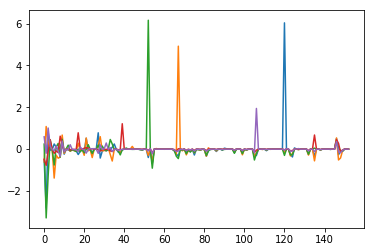

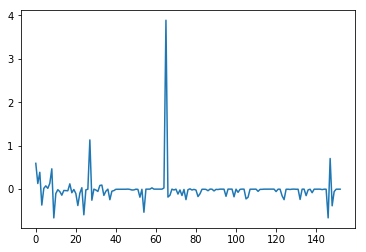

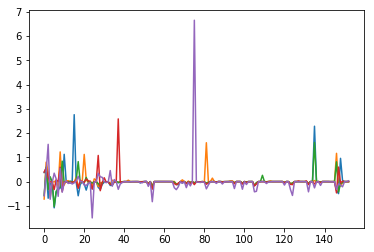

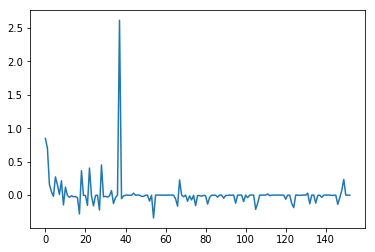

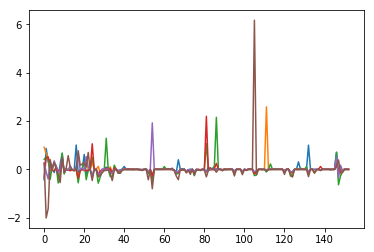

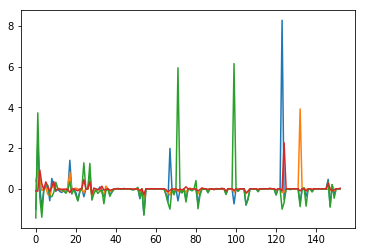

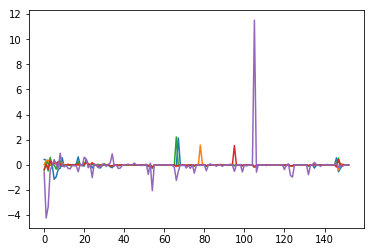

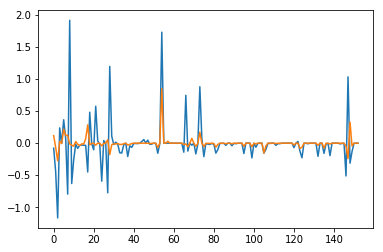

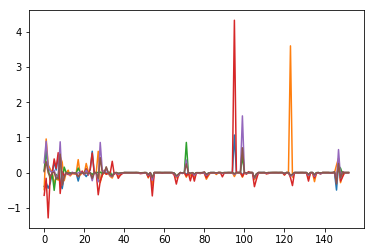

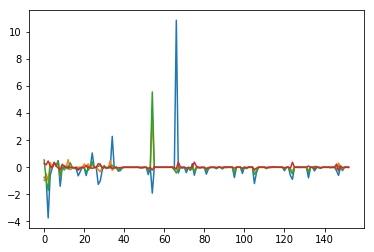

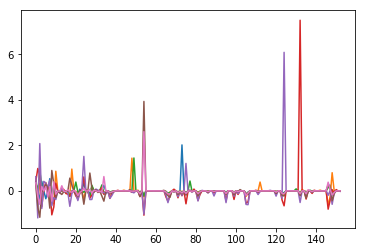

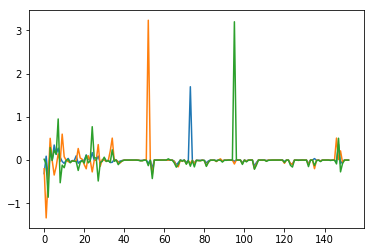

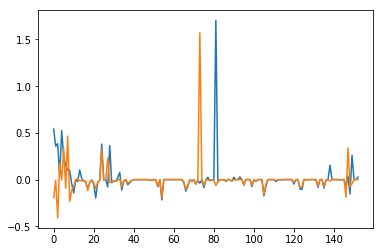

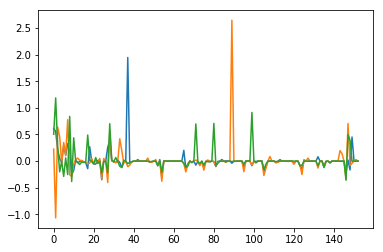

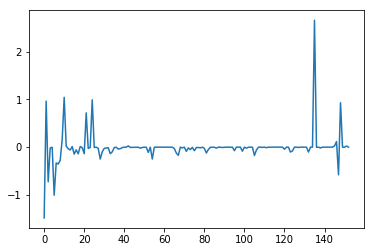

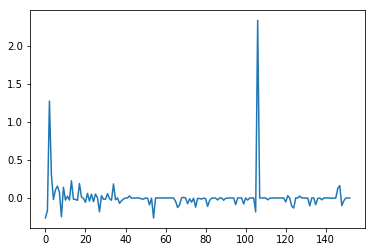

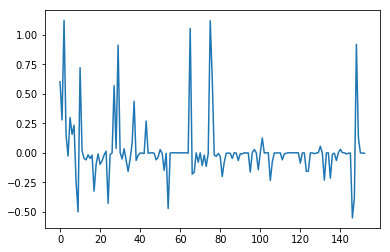

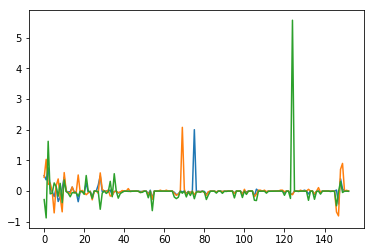

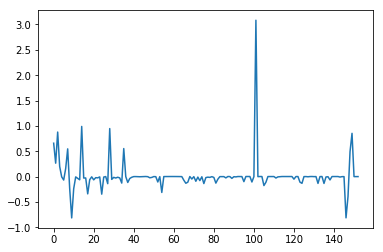

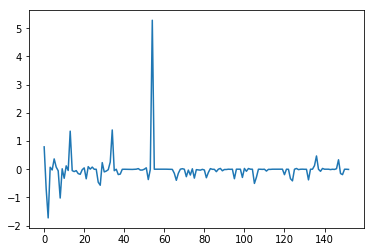

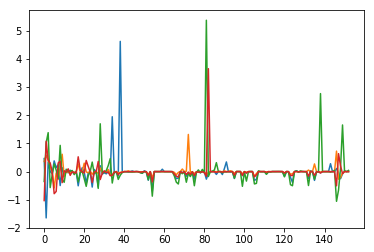

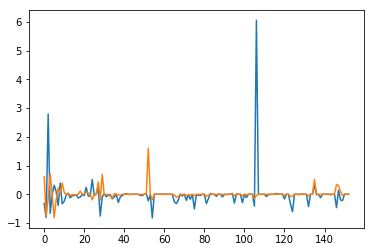

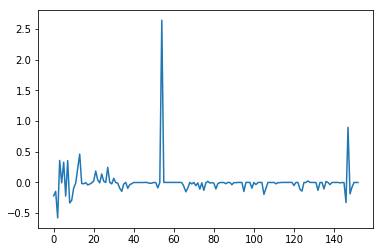

In [179]:
from collections import defaultdict 

dict = defaultdict(int)
for i in range(69):
    a = importances[i]
    max_val = np.argsort(a)[::-1][:5]
    for i in max_val:
        dict[features_final.columns[i]] += 1
    print(features_final.columns[max_val])
    
    plt.figure(i)
    plt.plot(a)

In [180]:
dict

defaultdict(int,
            {'natlty1_txt_South Africa': 1,
             'longitude': 24,
             'targtype1_txt_Police': 9,
             'targtype1_txt_Government (General)': 8,
             'weaptype1_txt_Explosives': 14,
             'natlty1_txt_Egypt': 2,
             'weaptype1_txt_Firearms': 17,
             'year_month': 18,
             'attacktype1_txt_Assassination': 15,
             'targtype1_txt_Abortion Related': 1,
             'natlty1_txt_United States': 6,
             'attacktype1_txt_Facility/Infrastructure Attack': 6,
             'weaptype1_txt_Incendiary': 6,
             'latitude': 25,
             'natlty1_txt_Algeria': 3,
             'targtype1_txt_Private Citizens & Property': 11,
             'targtype1_txt_Journalists & Media': 2,
             'targtype1_txt_Airports & Aircraft': 1,
             'natlty1_txt_Turkey': 3,
             'attacktype1_txt_Bombing/Explosion': 15,
             'natlty1_txt_Spain': 2,
             'natlty1_txt_France': 4,
 

In [184]:
import operator
sorted_dict = sorted(dict.items(), key=operator.itemgetter(1), reverse = True)

In [185]:
sorted_dict

[('latitude', 25),
 ('longitude', 24),
 ('year_month', 18),
 ('weaptype1_txt_Firearms', 17),
 ('attacktype1_txt_Assassination', 15),
 ('attacktype1_txt_Bombing/Explosion', 15),
 ('targtype1_txt_Military', 15),
 ('weaptype1_txt_Explosives', 14),
 ('attacktype1_txt_Armed Assault', 12),
 ('targtype1_txt_Private Citizens & Property', 11),
 ('targtype1_txt_Business', 11),
 ('nkill', 11),
 ('success', 10),
 ('targtype1_txt_Police', 9),
 ('natlty1_txt_Colombia', 9),
 ('targtype1_txt_Government (General)', 8),
 ('natlty1_txt_United States', 6),
 ('attacktype1_txt_Facility/Infrastructure Attack', 6),
 ('weaptype1_txt_Incendiary', 6),
 ('targtype1_txt_Utilities', 6),
 ('natlty1_txt_Israel', 5),
 ('natlty1_txt_Guatemala', 5),
 ('natlty1_txt_Northern Ireland', 5),
 ('natlty1_txt_India', 5),
 ('natlty1_txt_France', 4),
 ('natlty1_txt_Nicaragua', 4),
 ('weaptype1_txt_Melee', 4),
 ('natlty1_txt_Sri Lanka', 4),
 ('natlty1_txt_Algeria', 3),
 ('natlty1_txt_Turkey', 3),
 ('targtype1_txt_Government (Diplo

In [314]:
clf_final = LogisticRegression(random_state=0, multi_class='multinomial', solver ='newton-cg', C = 13)

In [315]:
clf_final.fit(X_train, y_train)

LogisticRegression(C=13, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [316]:
model = clf_final

importances = model.coef_
importances

array([[-3.61185119e+00, -1.06242728e+01,  6.14262238e+00, ...,
        -3.56902936e-03, -1.44842489e-03, -2.16960580e-03],
       [ 1.35332137e+01, -3.37454566e-01,  2.66909927e+00, ...,
        -5.12140787e-02, -7.88432823e-05, -9.61781004e-04],
       [ 3.94653306e+00,  2.54552218e+00, -4.31881563e+00, ...,
        -1.51861282e-03, -1.80007469e-03, -8.62884493e-05],
       ...,
       [ 1.89954996e+00,  7.39093229e+00, -2.04364135e+00, ...,
        -4.12326638e-03, -1.12769765e-02, -5.70824548e-02],
       [ 2.41671257e+00,  5.24763050e+00, -9.22617286e-01, ...,
        -8.09627747e-03, -1.02940103e-03, -1.94833869e-03],
       [ 1.46824150e+01, -1.81466203e+01, -1.12332505e+00, ...,
        -1.35584776e-04, -1.12131359e-05, -3.70992140e-06]])

In [317]:
importances.shape

(69, 153)

In [318]:
features_final.columns

Index(['year_month', 'latitude', 'longitude', 'success', 'suicide', 'nkill',
       'nwound', 'attacktype1_txt_Armed Assault',
       'attacktype1_txt_Assassination', 'attacktype1_txt_Bombing/Explosion',
       ...
       'natlty1_txt_Zambia', 'natlty1_txt_Zimbabwe', 'weaptype1_txt_Chemical',
       'weaptype1_txt_Explosives', 'weaptype1_txt_Firearms',
       'weaptype1_txt_Incendiary', 'weaptype1_txt_Melee',
       'weaptype1_txt_Other', 'weaptype1_txt_Sabotage Equipment',
       'weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],
      dtype='object', length=153)